# Checkpoint 2.2 : Exploratory Data Analysis

### Capstone Project Batch: B Group: 3               

* Capstone Project Domain: Automotive Industry
* Batch B
* Group 3
* Members: Tanisha Jain , Priya Bhardwaj, Aman Bhardwaj and Satyam Sharma

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [2]:
carSalesData = pd.read_csv('Car_sales_details_p3.csv')
salesStatus = pd.read_csv('sales_Status_p3.csv')
stateRegionMapping = pd.read_csv('State_region_mapping_p3.csv')


In [3]:
carSalesData.head(3)


,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,Maruti Swift Dzire VDI,2014,450000,145500,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5


In [4]:
salesStatus.head(3)

,Sales_ID,sold
0,1,Y
1,2,Y
2,3,Y


In [5]:
stateRegionMapping.head(3)

,Region,State or Province
0,Central,Illinois
1,Central,Indiana
2,Central,Iowa


In [6]:
carSalesData.shape 

(7906, 15)

In [7]:
salesStatus.head(3)

,Sales_ID,sold
0,1,Y
1,2,Y
2,3,Y


In [8]:
salesStatus.shape

(7906, 2)

In [9]:
stateRegionMapping.head(3)

,Region,State or Province
0,Central,Illinois
1,Central,Indiana
2,Central,Iowa


In [10]:
stateRegionMapping.shape

(49, 2)

# Merging the three dataframes and saving it into a new csv file

Merging datasets CarSalesData and SalesStatus on attribute salesID and then mapping the regions using the stateRegionMapping data. After merging, the shape of the MergedCarSalesData will be (7906, 18). The brand attribute has been engineered into the merged dataset by extracting the first words from the names of the car.

In [11]:

mergedCarSalesData = pd.merge(carSalesData,salesStatus,how='inner',on='Sales_ID')
mergedCarSalesData.head(3)

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,Y
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5,Y


In [12]:


keys = list(stateRegionMapping['State or Province'])
values = list(stateRegionMapping['Region'])
state_dict = {keys[i]: values[i] for i in range(len(keys))}
state_dict

{'Illinois': 'Central',
 'Indiana': 'Central',
 'Iowa': 'Central',
 'Kansas': 'Central',
 'Michigan': 'Central',
 'Minnesota': 'Central',
 'Missouri': 'Central',
 'Nebraska': 'Central',
 'North Dakota': 'Central',
 'Oklahoma': 'Central',
 'South Dakota': 'Central',
 'Texas': 'Central',
 'Wisconsin': 'Central',
 'Connecticut': 'East',
 'Delaware': 'East',
 'District of Columbia': 'East',
 'Maine': 'East',
 'Maryland': 'East',
 'Massachusetts': 'East',
 'New Hampshire': 'East',
 'New Jersey': 'East',
 'New York': 'East',
 'Ohio': 'East',
 'Pennsylvania': 'East',
 'Rhode Island': 'East',
 'Vermont': 'East',
 'West Virginia': 'East',
 'Alabama': 'South',
 'Arkansas': 'South',
 'Florida': 'South',
 'Georgia': 'South',
 'Kentucky': 'South',
 'Louisiana': 'South',
 'Mississippi': 'South',
 'North Carolina': 'South',
 'South Carolina': 'South',
 'Tennessee': 'South',
 'Virginia': 'South',
 'Arizona': 'West',
 'California': 'West',
 'Colorado': 'West',
 'Idaho': 'West',
 'Montana': 'West',
 'Ne

In [13]:
mergedCarSalesData['region'] = mergedCarSalesData['State or Province'].map(state_dict)

In [14]:
mergedCarSalesData.head(3)

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,region
0,1,Maruti Swift Dzire VDI,2014,450000,145500,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5,Y,East
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,Y,East
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5,Y,Central


In [15]:
brand=[]
for i in range(mergedCarSalesData.shape[0]):
    brand.append(mergedCarSalesData['name'][i].split()[0])

In [16]:
brand

['Maruti',
 'Skoda',
 'Honda',
 'Hyundai',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Maruti',
 'Toyota',
 'Ford',
 'Renault',
 'Maruti',
 'Maruti',
 'Maruti',
 'Mahindra',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Hyundai',
 'Mahindra',
 'Honda',
 'Maruti',
 'Maruti',
 'Tata',
 'Maruti',
 'Maruti',
 'Chevrolet',
 'Maruti',
 'Maruti',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Datsun',
 'Tata',
 'Maruti',
 'Jeep',
 'Honda',
 'Honda',
 'Maruti',
 'Maruti',
 'Maruti',
 'Toyota',
 'Toyota',
 'Mercedes-Benz',
 'Honda',
 'Mitsubishi',
 'Honda',
 'Maruti',
 'Honda',
 'Toyota',
 'Toyota',
 'Audi',
 'Toyota',
 'Audi',
 'Mercedes-Benz',
 'Tata',
 'Hyundai',
 'Hyundai',
 'Maruti',
 'Ford',
 'Maruti',
 'Volkswagen',
 'Honda',
 'Maruti',
 'Volkswagen',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Toyota',
 'Maruti',
 'Maruti',
 'Volkswagen',
 'Toyota',
 'Ford',
 'BMW',
 'Maruti',
 'Datsun',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Maruti',
 'Volkswagen',
 'Hyundai'

In [17]:
mergedCarSalesData['brand']=brand

In [18]:
mergedCarSalesData.head(2)

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,region,brand
0,1,Maruti Swift Dzire VDI,2014,450000,145500,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5,Y,East,Maruti
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,Y,East,Skoda


In [19]:
mergedCarSalesData.shape

(7906, 18)

In [20]:
mergedCarSalesData.to_csv('mergedCarSales.csv')

In [21]:
mergedCarSalesData['mileage'].head()

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
Name: mileage, dtype: object

In [22]:
for i in range(len(mergedCarSalesData)):
    mergedCarSalesData['mileage'][i] = mergedCarSalesData['mileage'][i].split()[0]
    mergedCarSalesData['engine'][i] = mergedCarSalesData['engine'][i].split()[0]
    mergedCarSalesData['max_power'][i] = mergedCarSalesData['max_power'][i].split()[0]


<ipython-input-22-8987e95fb8c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedCarSalesData['mileage'][i] = mergedCarSalesData['mileage'][i].split()[0]
<ipython-input-22-8987e95fb8c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedCarSalesData['engine'][i] = mergedCarSalesData['engine'][i].split()[0]
<ipython-input-22-8987e95fb8c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedCarSalesData['max_power'][i] = mer

In [23]:
mergedCarSalesData.engine = mergedCarSalesData.engine.astype('int64')
mergedCarSalesData.max_power = mergedCarSalesData.max_power.astype('float')
mergedCarSalesData.mileage = mergedCarSalesData.mileage.astype('float')

#### Assigning dummy values to strings

In [24]:
province_dict = {'District of Columbia': 1, 'New York' :2 , 'Illinois': 3, 'California' : 4,'Texas':5, 'Massachusetts':6, 
              'Washington':7, 'Georgia':8,'North Carolina':9, 'Florida':10, 'Pennsylvania':11, 'Michigan':12, 'Iowa':13,
              'Oregon':14, 'New Mexico':15, 'Maryland':16, 'Montana':17, 'Arkansas':18,'Arizona':19, 'Maine':20, 
              'Vermont':21, 'New Jersey':22, 'Connecticut':23,'Oklahoma':24, 'Tennessee':25, 'Alabama':26, 'Wisconsin':27,
              'South Carolina':28,'New Hampshire':29, 'Idaho':30, 'Minnesota':31, 'Ohio':32, 'Kansas':33, 'Utah':34,
              'Virginia':35, 'Nebraska':36, 'West Virginia':37, 'Colorado':38, 'Indiana':39,'Kentucky':40, 'Missouri':41, 
              'North Dakota':42, 'Rhode Island':43,'Louisiana':44, 'Wyoming':45, 'Nevada':46, 'Mississippi':47, 
              'Delaware':48,'South Dakota':49}

region_dict = {'East':1, 'Central':2, 'West':3, 'South':4}

transmission_dict = {'Manual' : 1 , 'Automatic' : 2}

seller_type_dict = {'Individual' : 1, 'Dealer' : 2, 'Trustmark Dealer' : 3}

owner_dict = {'First Owner':1,'Second Owner':2, 'Third Owner':3,'Fourth & Above Owner':4, 'Test Drive Car':5}

fuel_dict = {'Diesel':1, 'Petrol':2, 'LPG':3, 'CNG':4}

In [25]:
dummy_data = pd.get_dummies(mergedCarSalesData, columns=['sold'], drop_first=True)

In [26]:
dummy_data['State or Province'] = dummy_data['State or Province'].map(province_dict)
dummy_data['region'] = dummy_data['region'].map(region_dict)
dummy_data['transmission'] = dummy_data['transmission'].map(transmission_dict)
dummy_data['seller_type'] = dummy_data['seller_type'].map(seller_type_dict)
dummy_data['fuel'] = dummy_data['fuel'].map(fuel_dict)
dummy_data['owner'] = dummy_data['owner'].map(owner_dict)
dummy_data.head(3)

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,region,brand,sold_Y
0,1,Maruti Swift Dzire VDI,2014,450000,145500,1,Washington,1,1,1,1,23.40,1248,74.00,5,1,Maruti,1
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,2,New York City,1,1,1,2,21.14,1498,103.52,5,1,Skoda,1
2,3,Honda City 2017-2020 EXi,2006,158000,140000,3,Chicago,2,1,1,3,17.70,1497,78.00,5,2,Honda,1


In [27]:
dummy_data.owner.value_counts()

1    5215
2    2016
3     510
4     160
5       5
Name: owner, dtype: int64

In [28]:
dummy_data.dtypes


Sales_ID               int64
name                  object
year                   int64
selling_price          int64
km_driven              int64
State or Province      int64
City                  object
fuel                   int64
seller_type            int64
transmission           int64
owner                  int64
mileage              float64
engine                 int64
max_power            float64
seats                  int64
region                 int64
brand                 object
sold_Y                 uint8
dtype: object

In [29]:
sold = mergedCarSalesData[mergedCarSalesData['sold']=='Y']


In [30]:
print(sold.head(2))
print(sold.shape)

   Sales_ID                          name  year  selling_price  km_driven  \
0         1        Maruti Swift Dzire VDI  2014         450000     145500   
1         2  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   

      State or Province           City    fuel seller_type transmission  \
0  District of Columbia     Washington  Diesel  Individual       Manual   
1              New York  New York City  Diesel  Individual       Manual   

          owner  mileage  engine  max_power  seats sold region   brand  
0   First Owner    23.40    1248      74.00      5    Y   East  Maruti  
1  Second Owner    21.14    1498     103.52      5    Y   East   Skoda  
(2000, 18)


In [31]:
s = sold['brand'].value_counts()
d = mergedCarSalesData['brand'].value_counts()

In [32]:
s

Maruti           597
Hyundai          332
Mahindra         201
Tata             178
Toyota           126
Honda            124
Ford              92
Renault           56
Chevrolet         56
Volkswagen        39
Nissan            33
BMW               29
Jaguar            21
Skoda             20
Volvo             19
Mercedes-Benz     16
Datsun            16
Lexus             11
Jeep               9
Audi               9
Fiat               6
Mitsubishi         3
MG                 2
Kia                2
Land               1
Force              1
Daewoo             1
Name: brand, dtype: int64

# TASK 2.2 (Exploratory Data Analysis)
### Data Preparation/Analysis  tasks including (but not limited to) the following.
1.	Univariate, Bi- Variate Analysis and Multi- Variate Analysis
2.	Missing values identification and treatment 
3.	Outlier analysis and treatment 
4.	Data scaling using min-max and/or  Z-score normalisation 
5.	Data transformation 
6.	Feature Engineering


In [33]:
mergedCarSalesData.head()

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,region,brand
0,1,Maruti Swift Dzire VDI,2014,450000,145500,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Y,East,Maruti
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,Y,East,Skoda
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Y,Central,Honda
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Y,Central,Hyundai
4,5,Maruti Swift VXI BSIII,2007,130000,120000,New York,New York City,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Y,East,Maruti


## Q2.2.2.	Missing values identification and treatment 

In [34]:
mergedCarSalesData.isnull().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
seats                0
sold                 0
region               0
brand                0
dtype: int64

* There are no null values in the dataframe.
* However we find out that there are records in our dataset which have mileage 0.

In [35]:
mergedCarSalesData[mergedCarSalesData.mileage==0]

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,region,brand
625,645,Tata Indica Vista Aura Safire Anniversary Edition,2009,135000,28900,New York,New York City,Petrol,Individual,Manual,Second Owner,0.0,1172,65.00,5,Y,East,Tata
758,786,Hyundai Santro Xing GL,2009,120000,90000,New York,New York City,Petrol,Individual,Manual,Second Owner,0.0,1086,62.00,5,Y,East,Hyundai
1600,1650,Hyundai Santro Xing GL,2008,105000,128000,New York,North Babylon,Petrol,Individual,Manual,First Owner,0.0,1086,62.00,5,Y,East,Hyundai
1626,1677,Mercedes-Benz M-Class ML 350 4Matic,2011,1700000,110000,Pennsylvania,Altoona,Diesel,Individual,Automatic,Third Owner,0.0,2987,165.00,5,Y,East,Mercedes-Benz
2073,2138,Land Rover Freelander 2 TD4 HSE,2013,1650000,64788,Texas,Victoria,Diesel,Dealer,Automatic,First Owner,0.0,2179,115.00,5,N,Central,Land
2291,2367,Hyundai Santro Xing (Non-AC),2010,110000,80000,Oregon,Pendleton,Petrol,Individual,Manual,Second Owner,0.0,1086,62.10,5,N,West,Hyundai
2637,2726,Hyundai Santro Xing (Non-AC),2013,184000,15000,Illinois,Elk Grove Village,Petrol,Individual,Manual,First Owner,0.0,1086,62.10,5,N,Central,Hyundai
4395,4528,Mercedes-Benz M-Class ML 350 4Matic,2011,1700000,110000,California,Stockton,Diesel,Individual,Automatic,Third Owner,0.0,2987,165.00,5,N,West,Mercedes-Benz
5131,5277,Hyundai Santro Xing GL,2008,175000,40000,California,Temecula,Petrol,Individual,Manual,First Owner,0.0,1086,62.00,5,N,West,Hyundai
5676,5844,Volkswagen Polo GT TSI BSIV,2014,574000,28080,North Dakota,Mandan,Petrol,Dealer,Automatic,First Owner,0.0,1197,103.25,5,N,Central,Volkswagen


In [36]:
mileageAverage=mergedCarSalesData.groupby('brand')['mileage'].mean()

In [37]:
mergedCarSalesData[mergedCarSalesData.mileage==0].shape

(17, 18)

In [38]:
mergedCarSalesData['mileage']=mergedCarSalesData['mileage'].replace(0,np.nan)

In [39]:
mergedCarSalesData.isnull().sum()

Sales_ID              0
name                  0
year                  0
selling_price         0
km_driven             0
State or Province     0
City                  0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage              17
engine                0
max_power             0
seats                 0
sold                  0
region                0
brand                 0
dtype: int64

In [40]:
mergedCarSalesData['mileage']=mergedCarSalesData.groupby('brand')['mileage'].apply(lambda x: x.fillna(x.mean()))

In [41]:
mergedCarSalesData.isnull().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
seats                0
sold                 0
region               0
brand                0
dtype: int64

In [42]:
mergedCarSalesData.shape

(7906, 18)

In [43]:
dummy_data['mileage']=mergedCarSalesData['mileage']

In [44]:
mergedCarSalesData.mileage

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
7901    18.50
7902    16.80
7903    19.30
7904    23.57
7905    23.57
Name: mileage, Length: 7906, dtype: float64

In [45]:
dummy_data.mileage

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
7901    18.50
7902    16.80
7903    19.30
7904    23.57
7905    23.57
Name: mileage, Length: 7906, dtype: float64

In [46]:
mergedCarSalesData[mergedCarSalesData['mileage']==0]

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,region,brand


In [47]:
dummy_data[dummy_data['mileage']==0]

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,region,brand,sold_Y


## 2.2.1 Univariate, Bivariate and Multivariate Analysis

In [48]:
mergedCarSalesData.columns

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'sold', 'region',
       'brand'],
      dtype='object')

###  Univariate Analysis

(0.0, 300.0)

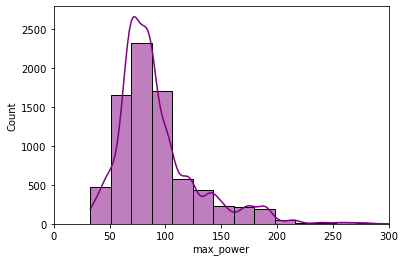

In [49]:
sns.histplot(mergedCarSalesData.max_power, kde= True, color = 'purple',bins=20)
plt.xlim([0,300])


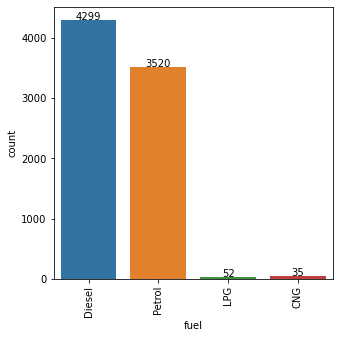

In [50]:
fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='fuel', data=mergedCarSalesData)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        mergedCarSalesData['fuel'].value_counts()[i],ha="center")
    i += 1

Mostly the number of cars which are in the market, belong to Diesel and Petrol.
LPG and CNG cars make around 1.2% of total cars.

In [51]:
mergedCarSalesData['seats'].value_counts()

5     6254
7     1120
8      235
4      133
9       80
6       62
10      19
2        2
14       1
Name: seats, dtype: int64

### Bivariate Analysis

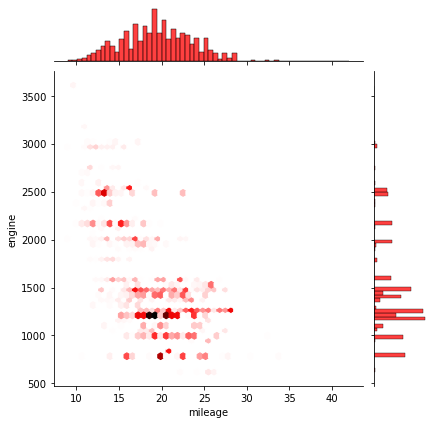

In [52]:
sns.jointplot(data=mergedCarSalesData,kind='hex',x='mileage',y='engine',color='red')

Majority of the cars fall under the given range: 
* engine: 1000 to 1500 cc
* mileage: around 15-25

In [53]:
mergedCarSalesData.columns

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'sold', 'region',
       'brand'],
      dtype='object')

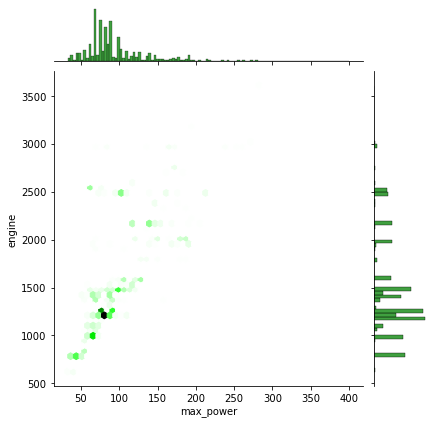

In [54]:

sns.jointplot(data=mergedCarSalesData,kind='hex',x='max_power',y='engine',color='green')

<AxesSubplot:xlabel='transmission', ylabel='count'>

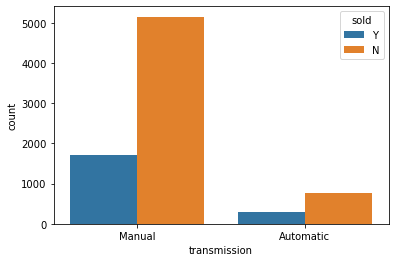

In [55]:
sns.countplot(data=mergedCarSalesData, x='transmission',hue='sold')

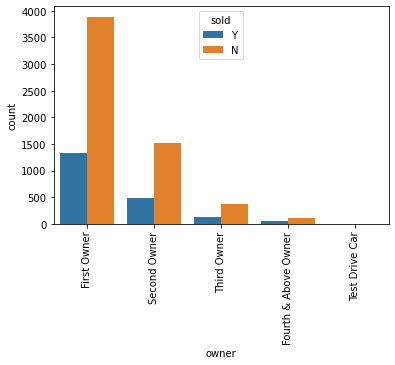

In [56]:
sns.countplot(data=mergedCarSalesData, x='owner',hue='sold')
plt.xticks(rotation=90);

<AxesSubplot:>

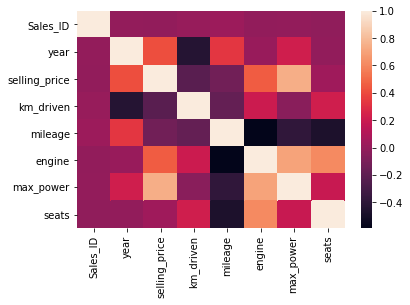

In [57]:
sns.heatmap(mergedCarSalesData.corr())

None of the attributes are very highly correlated with each other.

<AxesSubplot:xlabel='region', ylabel='engine'>

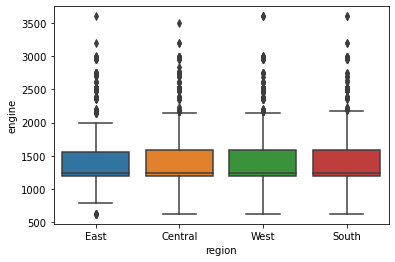

In [58]:
sns.boxplot(data=mergedCarSalesData,x='region',y='engine')

### Multivariate Analysis

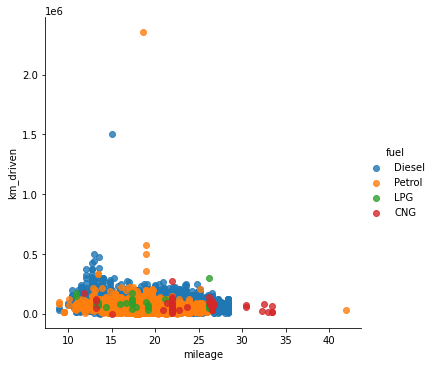

In [59]:
sns.lmplot(data=mergedCarSalesData,y='km_driven',x='mileage',fit_reg=None,hue='fuel')

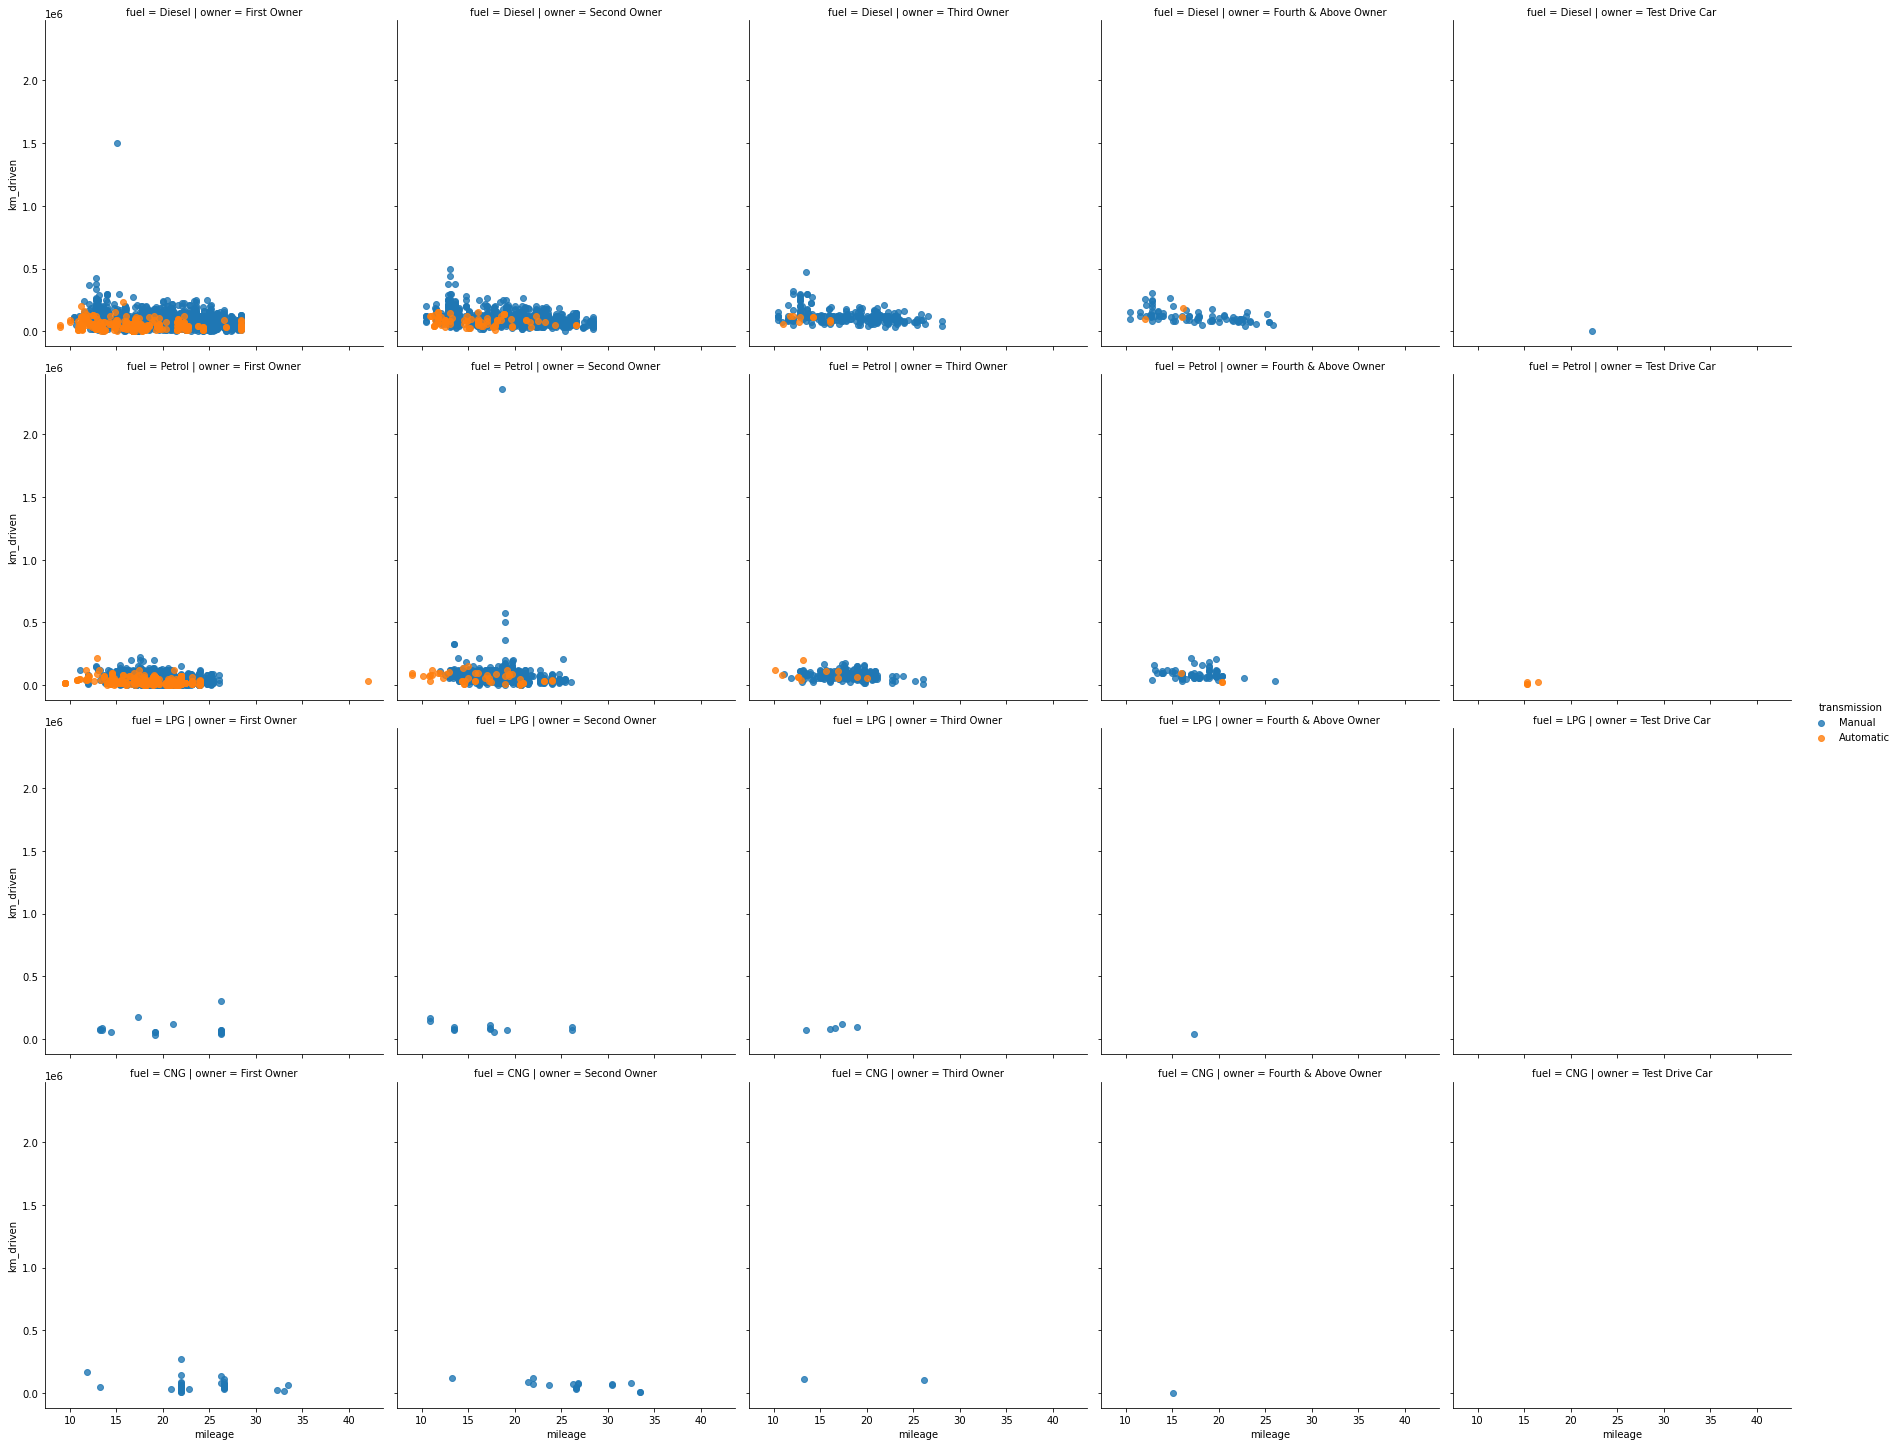

In [60]:

sns.lmplot(data=mergedCarSalesData,y='km_driven',x='mileage',fit_reg=None,row='fuel',hue='transmission',col='owner')

**Insights from the above plot:**
* There are only a handful of test drive cars (for diese and petrol). No test drive cars for LPG and CNG fuel.
* There are only manual cars for LPG and CNG.The total number of cars are very less, which makes it an unbalanced distribution.
* There are very few automatic cars for both petrol and diesel in case of third and above owner type.


In [61]:

from scipy import stats
jarque_bera_test = stats.jarque_bera(mergedCarSalesData['selling_price'])
jarque_bera_test

Jarque_beraResult(statistic=162830.687642466, pvalue=0.0)

In [62]:
jarque_bera_test

Jarque_beraResult(statistic=162830.687642466, pvalue=0.0)

In [63]:
mergedCarSalesData.km_driven.unique()

array([ 145500,  120000,  140000,  127000,   45000,  175000,    5000,
         90000,  169000,   68000,  100000,   40000,   70000,   53000,
         80000,   50000,   72000,   35000,   28000,   25000,    2388,
         16200,   10000,   15000,   42000,   60000,   76000,   28900,
         86300,   23300,   32600,   10300,   77000,   99000,   27800,
         49800,  151000,   54700,   64000,   63000,  127700,   33900,
         59000,  110000,  147000,   30000,  135000,    9850,   78000,
        170000,   49000,   32000,   38000,   44000,   12000,   55500,
         61500,  150000,   37800,  114000,   48000,   69000,   13000,
         76139,   65000,    1303,   31800,   20000,   17000,   21000,
         37000,   29500,    7500,   19000,   41000,   39000,   22000,
         47000,   72200,   49900,    9000,   11000,   95000,   18000,
         46100,   16000,    9654,   24300,   42163,    8000,   71000,
          9500,   36600,   14000,  120600,   86000,    7800,   31377,
         75000,   93

## Q 2.2.3 Outlier Analysis and Treatment

In [64]:
print('Kms Driven:')
Q1 = np.percentile(mergedCarSalesData.km_driven,25)
Q3 = np.percentile(mergedCarSalesData.km_driven,75)

print("Q1:", Q1)
print("Q3:", Q3)

IQR = Q3 - Q1
print("IQR:", IQR)

x = Q3 + 1.5*IQR #upper_bound
y = Q1 - 1.5*IQR #lower_bound

print("Q3 + 1.5 IQR : ",x)
print("Q1 - 1.5 IQR : ",y)
print('No of outliers found using IQR Method:',mergedCarSalesData[(mergedCarSalesData['km_driven']>x) | (mergedCarSalesData['km_driven']<y)].shape[0])

Kms Driven:
Q1: 35000.0
Q3: 95425.0
IQR: 60425.0
Q3 + 1.5 IQR :  186062.5
Q1 - 1.5 IQR :  -55637.5
No of outliers found using IQR Method: 194


In [65]:
km_driven=mergedCarSalesData[(mergedCarSalesData['km_driven']>x) | (mergedCarSalesData['km_driven']<y)]

In [66]:
mergedCarSalesData[mergedCarSalesData['km_driven']<1000]

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,region,brand
7695,7914,Maruti Eeco 5 STR With AC Plus HTR CNG,2011,209000,1,Indiana,Indianapolis,CNG,Individual,Manual,Fourth & Above Owner,15.1,1196,73.0,5,N,Central,Maruti


In [67]:
set(mergedCarSalesData.km_driven)

{1,
 1000,
 1300,
 1303,
 1500,
 1600,
 1620,
 2000,
 2118,
 2136,
 2286,
 2300,
 2350,
 2388,
 2560,
 2600,
 2700,
 2789,
 2860,
 3000,
 3010,
 3100,
 3177,
 3500,
 3564,
 4000,
 4295,
 4300,
 4337,
 4500,
 4701,
 4773,
 4875,
 5000,
 5200,
 5229,
 5400,
 5500,
 5621,
 5800,
 6000,
 6001,
 6200,
 6500,
 6544,
 6550,
 6750,
 6757,
 6825,
 7000,
 7032,
 7200,
 7300,
 7400,
 7500,
 7600,
 7672,
 7673,
 7720,
 7800,
 7949,
 7967,
 7976,
 8000,
 8079,
 8500,
 8576,
 8588,
 8600,
 9000,
 9200,
 9400,
 9500,
 9599,
 9654,
 9656,
 9750,
 9850,
 9900,
 10000,
 10200,
 10300,
 10500,
 10800,
 11000,
 11500,
 11533,
 11688,
 12000,
 12500,
 12584,
 12700,
 12800,
 13000,
 13120,
 13500,
 13534,
 13663,
 13887,
 14000,
 14200,
 14317,
 14495,
 14548,
 14700,
 15000,
 15151,
 15200,
 15381,
 15500,
 15732,
 15780,
 15858,
 16000,
 16034,
 16151,
 16200,
 16500,
 16589,
 16700,
 16830,
 17000,
 17100,
 17500,
 17601,
 18000,
 18300,
 18484,
 18500,
 18816,
 18890,
 18945,
 19000,
 19100,
 19500,
 1

In [68]:
mergedCarSalesData=mergedCarSalesData[mergedCarSalesData['km_driven']>=10]

Since it is practically not possible for a fourth owner to have a car with km_driven =1, we are removing it.

In [69]:
mergedCarSalesData.shape

(7905, 18)

In [70]:
dummy_data.columns

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'region', 'brand',
       'sold_Y'],
      dtype='object')

In [71]:
dummy_data.head(2)

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,region,brand,sold_Y
0,1,Maruti Swift Dzire VDI,2014,450000,145500,1,Washington,1,1,1,1,23.40,1248,74.00,5,1,Maruti,1
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,2,New York City,1,1,1,2,21.14,1498,103.52,5,1,Skoda,1


In [72]:
dummy_data[dummy_data['km_driven']==1
          ]

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,region,brand,sold_Y
7695,7914,Maruti Eeco 5 STR With AC Plus HTR CNG,2011,209000,1,39,Indianapolis,4,1,1,4,15.1,1196,73.0,5,2,Maruti,0


In [73]:
dummy_data=dummy_data[dummy_data['km_driven']>10]

In [74]:
print('Engine:')
q1 = np.percentile(mergedCarSalesData.engine,25)
q3 = np.percentile(mergedCarSalesData.engine,75)
print("Q1:", q1)
print("Q3:", q3)
IQR = q3 - q1
print("IQR:", IQR)
x = q3 + 1.5*IQR #upper_bound
y = q1 - 1.5*IQR #lower_bound
print("Q3 + 1.5 IQR : ",x)
print("Q1 - 1.5 IQR : ",y)
print('No Of Outliers using IQR Method:',mergedCarSalesData[(mergedCarSalesData['engine']>x) | (mergedCarSalesData['engine']<y)].shape[0])

Engine:
Q1: 1197.0
Q3: 1582.0
IQR: 385.0
Q3 + 1.5 IQR :  2159.5
Q1 - 1.5 IQR :  619.5
No Of Outliers using IQR Method: 1183


In [75]:
mergedCarSalesData[(mergedCarSalesData['engine']>x) | (mergedCarSalesData['engine']<y)]

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,region,brand
37,40,Tata Safari DICOR 2.2 LX 4x2,2011,425000,60000,North Carolina,Charlotte,Diesel,Individual,Manual,Second Owner,13.93,2179,138.03,7,Y,South,Tata
45,48,Toyota Fortuner 4x4 MT,2014,1500000,77000,Washington,Seattle,Diesel,Dealer,Manual,First Owner,12.55,2982,168.50,7,Y,West,Toyota
46,49,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2013,700000,99000,New York,New York City,Diesel,Dealer,Manual,First Owner,12.99,2494,100.00,7,Y,East,Toyota
49,52,Mitsubishi Pajero Sport 4X4,2013,1090000,151000,Washington,Seattle,Diesel,Dealer,Manual,First Owner,13.50,2477,175.56,7,Y,West,Mitsubishi
53,56,Toyota Innova Crysta 2.8 ZX AT BSIV,2016,1650000,127700,Massachusetts,Boston,Diesel,Dealer,Automatic,Second Owner,11.36,2755,171.50,7,Y,East,Toyota
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7850,8072,Toyota Innova 2.5 V Diesel 7-seater,2010,425000,200000,New Mexico,Alamogordo,Diesel,Individual,Manual,Second Owner,12.80,2494,102.00,7,N,West,Toyota
7856,8078,Toyota Innova 2.5 E 7 STR,2009,550000,250000,New Mexico,Alamogordo,Diesel,Individual,Manual,First Owner,12.80,2494,102.00,7,N,West,Toyota
7859,8081,Tata New Safari DICOR 2.2 EX 4x2,2010,300000,100000,Washington,Yakima,Diesel,Individual,Manual,First Owner,11.57,2179,138.10,7,N,West,Tata
7878,8100,Mahindra XUV500 W8 2WD,2013,750000,120000,Indiana,Elkhart,Diesel,Individual,Manual,First Owner,15.10,2179,140.00,7,N,Central,Mahindra


In [76]:
mu = np.mean(mergedCarSalesData.max_power)
sigma = np.std(mergedCarSalesData.max_power)
upper_bound=mu + 3*sigma
lower_bound= mu - 3*sigma
print('Max Power:')
print('Mean:',mu,'\nStandard Deviation:',sigma,'\nUpper and Lower Bound',upper_bound,'&',lower_bound)
#print()
print('No Of Outliers found using Z Method:',mergedCarSalesData[(mergedCarSalesData.max_power>upper_bound) | (mergedCarSalesData.max_power<lower_bound)].shape[0])


Max Power:
Mean: 91.58972485768456 
Standard Deviation: 35.746604691280425 
Upper and Lower Bound 198.82953893152583 & -15.650089216156715
No Of Outliers found using Z Method: 90


In [77]:
mu=np.mean(mergedCarSalesData['mileage'])
sigma=np.std(mergedCarSalesData['mileage'] )
upper_bound=mu + 3*sigma
lower_bound= mu - 3*sigma
print('Mileage:')
print('Mean:',mu,'\nStandard Deviation:',sigma,'\nUpper and Lower Bound',upper_bound,'&',lower_bound)
print('No Of Outliers found using Z Method:',mergedCarSalesData[(mergedCarSalesData['mileage'] >upper_bound) | (mergedCarSalesData['mileage'] <lower_bound)].shape[0])

Mileage:
Mean: 19.458925997129814 
Standard Deviation: 3.936462970787215 
Upper and Lower Bound 31.26831490949146 & 7.649537084768168
No Of Outliers found using Z Method: 7


In [78]:
mergedCarSalesData[(mergedCarSalesData['mileage'] >upper_bound) | (mergedCarSalesData['mileage'] <lower_bound)]

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,region,brand
33,36,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,Washington,Seattle,CNG,Individual,Manual,Second Owner,33.44,796,40.30,4,Y,West,Maruti
164,171,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,New York,New York City,Petrol,Individual,Automatic,First Owner,42.00,1969,400.00,4,Y,East,Volvo
2239,2313,Maruti Wagon R CNG LXI,2013,270000,80000,Pennsylvania,Scranton,CNG,Individual,Manual,Second Owner,32.52,998,58.33,5,N,East,Maruti
3790,3909,Maruti Alto 800 CNG LXI,2017,260000,67000,Florida,Lake Worth,CNG,Individual,Manual,First Owner,33.44,796,40.30,4,N,South,Maruti
5626,5790,Maruti Alto K10 LXI CNG,2019,430000,20000,Minnesota,Prior Lake,CNG,Individual,Manual,First Owner,32.26,998,58.30,4,N,Central,Maruti
5650,5816,Maruti Alto 800 LXI CNG,2020,370000,16000,Illinois,Freeport,CNG,Individual,Manual,First Owner,33.00,796,47.30,5,N,Central,Maruti
7332,7544,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,Michigan,Mount Pleasant,CNG,Individual,Manual,Second Owner,33.44,796,40.30,4,N,Central,Maruti


**Outliers for mileage:**
* Total:7 (6 for CNG and 1 petrol)
* the outliers for mileage are cars are mainly Maruti Alto with the seating capacity of 4-5.

**Outliers for Kilometer driven:**
* almost all the outliers are diesel vehicles having seating of mainly 5 and7

**Outliers for engine:**
* the outliers in engine power are mainly SUVs or luxury sedans having relative low mileage and seating capacity of mainly 7,8


In [79]:
dummy_data.shape

(7905, 18)

## Q 2.2.6 Feature Engineering

1. Extracting brands from the car names to extract common features for each brand.
2. Converting the years attribute to the difference of the year bought and the present year, so that it can be visualized if there is a relation between the selling price and the increasing years.

In [80]:
dummy_data['year']=pd.to_datetime('now').year - dummy_data['year']

In [81]:
dummy_data['year'].unique()

array([ 7, 15, 11, 14,  4, 20, 10,  8, 16, 12,  5,  9, 19,  6,  3,  2, 13,
        1, 22, 21, 18, 17, 27, 23, 24, 26, 25], dtype=int64)

In [82]:
dummy_data.head(2)

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,region,brand,sold_Y
0,1,Maruti Swift Dzire VDI,7,450000,145500,1,Washington,1,1,1,1,23.40,1248,74.00,5,1,Maruti,1
1,2,Skoda Rapid 1.5 TDI Ambition,7,370000,120000,2,New York City,1,1,1,2,21.14,1498,103.52,5,1,Skoda,1


## Q 2.2.4-2.2.5 Scaling and Transformation


In [83]:
def MinMaxScale(df):
    for col in df.columns:
        df[col]=(df[col]-df[col].min())/(df[col].max()-df[col].min())
    return df

In [84]:
def StandardScale(df):
    for col in df.columns:
        df[col]=(df[col]-df[col].mean())/(df[col].std())
    return df

In [85]:
df=dummy_data.drop(['brand','name','City','Sales_ID'],axis=1)
minMaxScaled=MinMaxScale(df)
minMaxScaled

,year,selling_price,km_driven,State or Province,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,region,sold_Y
0,0.230769,0.042126,0.061243,0.000000,0.000000,0.0,0.0,0.00,0.436364,0.209396,0.112200,0.25,0.000000,1.0
1,0.230769,0.034102,0.050435,0.020833,0.000000,0.0,0.0,0.25,0.367879,0.293289,0.192593,0.25,0.000000,1.0
2,0.538462,0.012839,0.058912,0.041667,0.333333,0.0,0.0,0.50,0.263636,0.292953,0.123094,0.25,0.333333,1.0
3,0.384615,0.019559,0.053402,0.041667,0.000000,0.0,0.0,0.00,0.424242,0.259060,0.155773,0.25,0.333333,1.0
4,0.500000,0.010030,0.050435,0.020833,0.333333,0.0,0.0,0.00,0.215152,0.226174,0.150871,0.25,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,0.269231,0.029087,0.046197,0.083333,0.333333,0.0,0.0,0.00,0.287879,0.192282,0.136302,0.25,0.333333,0.0
7902,0.500000,0.010532,0.050012,0.083333,0.000000,0.0,0.0,0.75,0.236364,0.291611,0.210240,0.25,0.333333,0.0
7903,0.423077,0.035306,0.050435,0.083333,0.000000,0.0,0.0,0.00,0.312121,0.209396,0.111928,0.25,0.333333,0.0
7904,0.269231,0.026078,0.010172,0.104167,0.000000,0.0,0.0,0.00,0.441515,0.259060,0.101307,0.25,0.000000,0.0


In [86]:
df=dummy_data.drop(['brand','name','City','Sales_ID'],axis=1)
standardScaled=StandardScale(df)
standardScaled

,year,selling_price,km_driven,State or Province,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,region,sold_Y
0,-0.004060,-0.245655,1.343579,-1.164593,-0.868986,-0.426264,-0.389412,-0.629199,1.001108,-0.418208,-0.492036,-0.434133,-1.322615,1.718175
1,-0.004060,-0.343981,0.894560,-1.089468,-0.868986,-0.426264,-0.389412,0.778619,0.427025,0.077906,0.333725,-0.434133,-1.322615,1.718175
2,2.066444,-0.604545,1.246732,-1.014344,0.966262,-0.426264,-0.389412,2.186437,-0.446801,0.075921,-0.380144,-0.434133,-0.386769,1.718175
3,1.031192,-0.522197,1.017820,-1.014344,-0.868986,-0.426264,-0.389412,-0.629199,0.899500,-0.124509,-0.044469,-0.434133,-0.386769,1.718175
4,1.807631,-0.638959,0.894560,-1.089468,0.966262,-0.426264,-0.389412,-0.629199,-0.853231,-0.318986,-0.094820,-0.434133,-1.322615,1.718175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,0.254753,-0.405435,0.718475,-0.864096,0.966262,-0.426264,-0.389412,-0.629199,-0.243586,-0.519416,-0.244476,-0.434133,-0.386769,-0.581939
7902,1.807631,-0.632814,0.876952,-0.864096,-0.868986,-0.426264,-0.389412,3.594255,-0.675418,0.067983,0.514989,-0.434133,-0.386769,-0.581939
7903,1.290005,-0.329232,0.894560,-0.864096,-0.868986,-0.426264,-0.389412,-0.629199,-0.040370,-0.418208,-0.494833,-0.434133,-0.386769,-0.581939
7904,0.254753,-0.442307,-0.778253,-0.788971,-0.868986,-0.426264,-0.389412,-0.629199,1.044291,-0.124509,-0.603928,-0.434133,-1.322615,-0.581939


In [87]:
dummy_data.to_csv('ProcessedCarData.csv')

In [88]:
mergedCarSalesData.columns

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'sold', 'region',
       'brand'],
      dtype='object')

In [89]:
mergedCarSalesData.to_csv('Updated.csv')